In [3]:
import pandas as pd

# Example DataFrame creation
data = {
    'published_date': ['2020-06-01', '2020-06-02', '2020-06-03']
}
news_df = pd.DataFrame(data)



In [5]:
news_df['date'] = pd.to_datetime(news_df['published_date']).dt.date
print(news_df)


  published_date        date
0     2020-06-01  2020-06-01
1     2020-06-02  2020-06-02
2     2020-06-03  2020-06-03


In [11]:
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv")

news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [1]:
import pandas as pd

# Example news data
news_df['date'] = pd.to_datetime(news_df['published_date']).dt.date
news_df = news_df.groupby('date')['headline'].apply(list).reset_index()


NameError: name 'news_df' is not defined

In [3]:
""" 1. Load Stock Data
Fetch stock data using yfinance: """

import pandas as pd
import yfinance as yf

# Load stock data
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.768463  125.070000  130.899994  124.169998  130.279999   
2023-01-04  125.045044  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.718979  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.271118  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.795593  130.149994  133.410004  129.889999  130.470001   

Price          Volume  
Ticker           AAPL  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


In [5]:
# 2. Technical Indicators with TA-Lib
# Calculate basic indicators: SMA, RSI, and MACD.

import talib

# Moving Average (SMA)
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)

# Relative Strength Index (RSI)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
data['MACD'], data['MACD_signal'], _ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

print(data.tail())


TypeError: Argument 'real' has incorrect type (expected numpy.ndarray, got DataFrame)

KeyError: 'SMA_20'

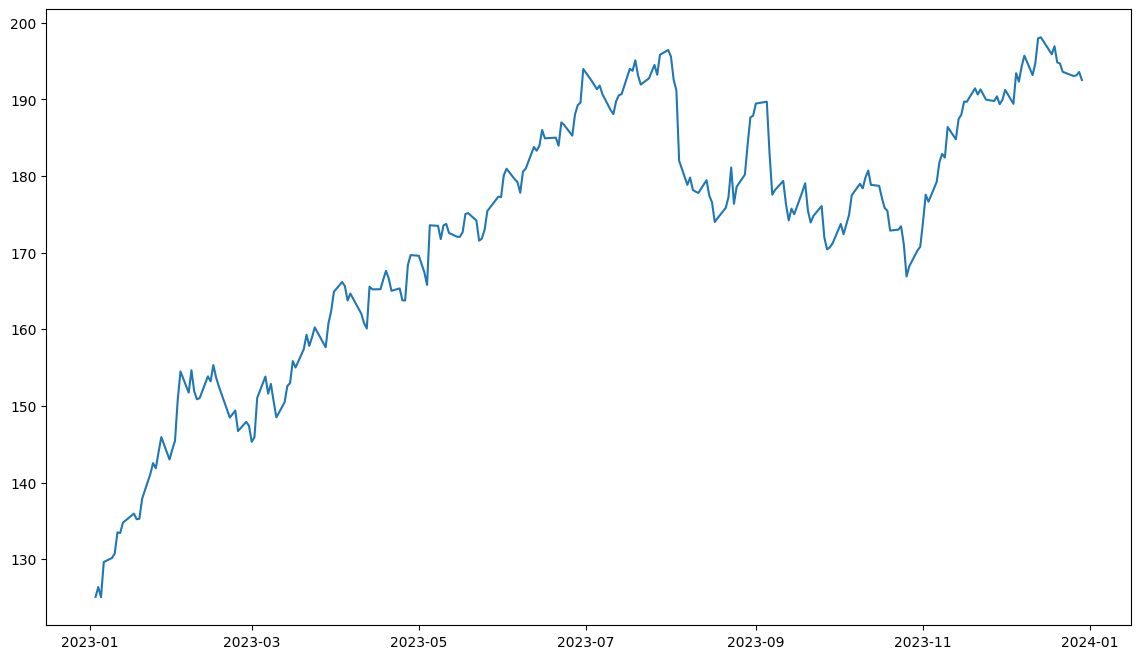

In [6]:
# 3. Visualize Indicators
# Plot data and calculated indicators using matplotlib.

import matplotlib.pyplot as plt

# Plot closing prices and indicators
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='SMA 20')
plt.legend()
plt.title('Stock Price with SMA')
plt.show()

# Plot RSI
plt.figure()
plt.plot(data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')  # Overbought
plt.axhline(30, color='green', linestyle='--')  # Oversold
plt.title('RSI')
plt.legend()
plt.show()
